In [2]:
import cv2
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('./data_detect/runs/detect/train17/weights/best.pt')

# Open the video file
video_path = "./data_detect/video/video1.mp4"
cap = cv2.VideoCapture(video_path)
names = model.names
print(names)
# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, persist=True)
        # check = False
        # for c in results[0].boxes.cls:
        #     if names[int(c)] != "car":
        #         check = True
        #         break
        # if check:
        #     cv2.imshow("YOLOv8 Tracking", frame)
        # else:                
            # Visualize the results on the frame
        annotated_frame = results[0].plot()
            # Display the annotated frame
        cv2.imshow("YOLOv8 Tracking", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()


{0: 'car'}

0: 384x640 2 cars, 12.1ms
Speed: 1.0ms preprocess, 12.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 8.5ms
Speed: 1.0ms preprocess, 8.5ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 7.0ms
Speed: 1.1ms preprocess, 7.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 4.5ms
Speed: 1.0ms preprocess, 4.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 3.5ms
Speed: 1.0ms preprocess, 3.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640

In [1]:
import tensorflow as tf
import numpy as np
import cv2
from keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

In [2]:
model = load_model('./models/object_detection.h5')

1/1 [==============================] - 3s 3s/step
(1028, 813) (1291, 893)


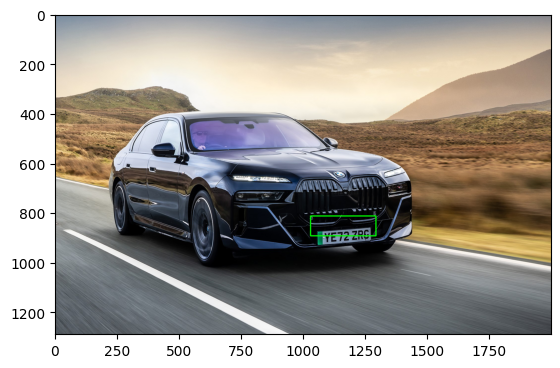

In [3]:
path = './data/number-plate-detection/TEST/best_electric_luxury_car_bmw_i7.jpg'

def object_detection(path):
    
    # Read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    
    # Data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # Convert to array & normalized
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    
    # Make predictions
    coords = model.predict(test_arr)
    
    # Denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    
    # Draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

image,coords = object_detection(path)
plt.imshow(image)


0: 416x640 4 cars, 15.4ms
Speed: 8.1ms preprocess, 15.4ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)
[[227.24635314941406, 114.34855651855469, 987.3663940429688, 596.8766479492188, 0.9609803557395935, 0.0], [0.1428365558385849, 133.01950073242188, 125.84318542480469, 216.28863525390625, 0.6550952196121216, 0.0], [952.4108276367188, 129.10276794433594, 1062.7392578125, 195.04281616210938, 0.5524405241012573, 0.0], [812.2349853515625, 145.83416748046875, 870.255126953125, 174.02125549316406, 0.44587990641593933, 0.0]]
227.24635314941406 114.34855651855469 987.3663940429688 596.8766479492188

0: 416x640 1 plate, 7.9ms
Speed: 1.0ms preprocess, 7.9ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)


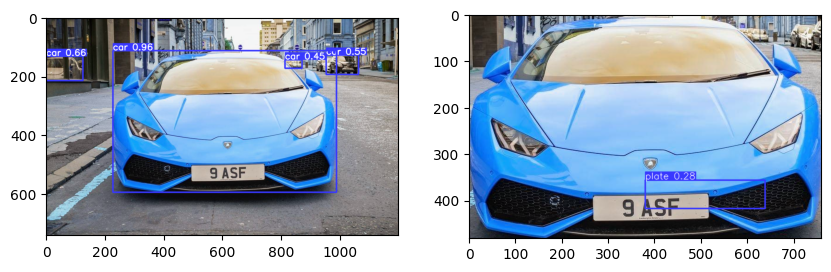

In [10]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

detect_car = YOLO('./data_detect/runs/detect/train17/weights/best.pt')
detect_plate = YOLO('./data_plate_detect/runs/detect/train3/weights/best.pt')
def detect_car_plate(path):
    image = cv2.imread(path)
    results = detect_car.predict(source=image)
    predictions = results[0].boxes.data.tolist()
    print(predictions)
    predictions = predictions[0]
    xmin, ymin, xmax, ymax = predictions[:4]
    print(xmin, ymin, xmax, ymax)
    xmin, ymin, xmax, ymax = int(xmin), int(ymin), int(xmax), int(ymax)
    return results[0].plot(), image[ymin:ymax, xmin:xmax]

path = './data/number-plate-detection/TEST/whose-number-plate-is-this.jpg'

pltcar,img_car = detect_car_plate(path)
fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(pltcar)


results = detect_plate.predict(source=img_car)
ax[1].imshow(results[0].plot())

1/1 [==============================] - 1s 1s/step
(310, 317) (473, 360)


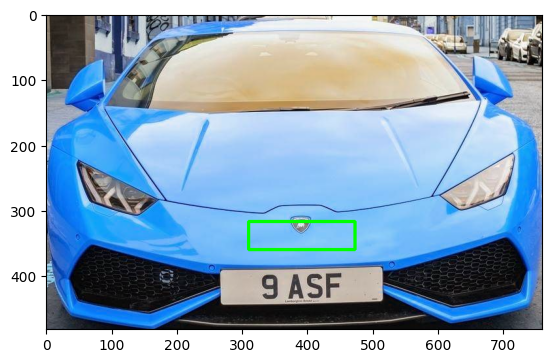

In [11]:
model = load_model('./models/object_detection.h5')

def object_detection(img_car):
    image = np.array(img_car,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    
    # Data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # Convert to array & normalized
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    
    # Make predictions
    coords = model.predict(test_arr)
    
    # Denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    
    # Draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

image,coords = object_detection(img_car)
plt.imshow(image)